In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load both the train and test data set
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [3]:
# check on dimensions
print(train_set.shape, test_set.shape)

(1460, 81) (1459, 80)


In [4]:
# Combine the train and test data set before data wrangling
full_set = train_set.merge(test_set, how = 'outer')

In [5]:
# Remove the Id column
full_set.drop('Id', axis = 1, inplace = True)

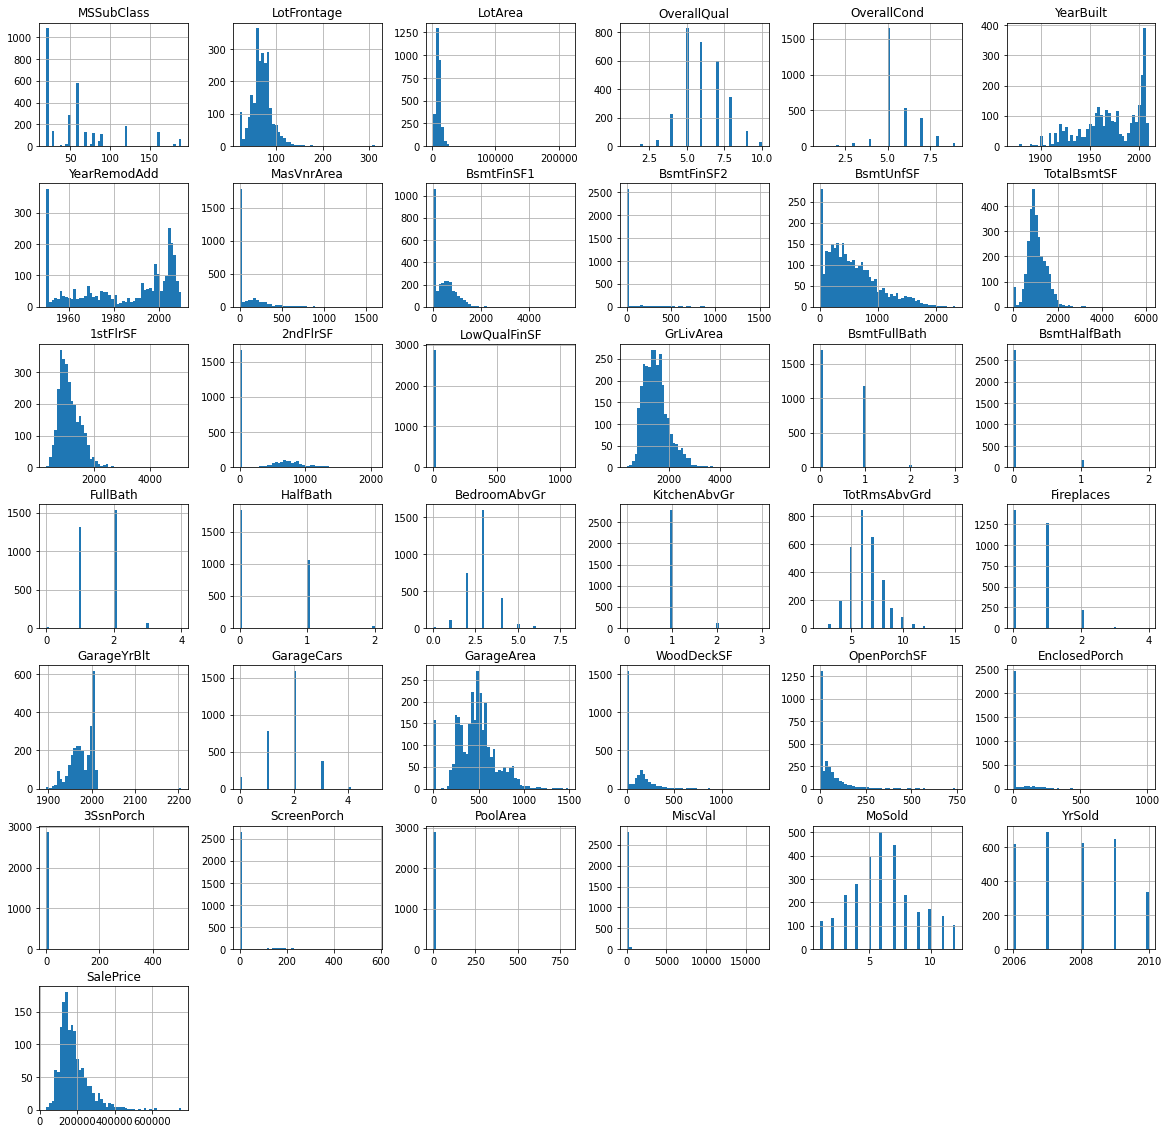

In [6]:
# Check on the histrogram for the train set
full_set.hist(bins = 50, figsize=(20,20))
plt.show()

In [7]:
# use descrbie() to get more insight of the data distribution
full_set.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


From the histagram and describe, we notice some outliers such as extremely large LotFontage. However, it might be possible for some super mansions. Let's keep them for now. One outlier that is wrong for sure is the 2207 in the GarageYrBlt. It is very likely that this value should be 2007 instead. Let's replace it

In [8]:
full_set.GarageYrBlt.replace(2207,2007, inplace = True)

In [9]:
full_set.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


Now try to deal with the missing value by first checking which columns have the missing value

In [10]:
# list down the missing value and its percentage 
missing = pd.concat([full_set.isna().sum(), full_set.isna().sum()/len(full_set)], axis = 1)
missing.columns = ['# of NaN','Percentage']
missing.sort_values('Percentage',ascending = False, inplace = True)
missing.head(40)

,# of NaN,Percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471


Some missing values actually mean that the house doesn't have that specific features. We can replace those missing values with None

In [11]:
# The list of the meaningful missing values
None_list = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageFinish','GarageCond','GarageType','GarageType','GarageQual','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType']

In [12]:
# Replace the missing value with None

for feature in None_list:
    full_set[feature].fillna('None', inplace = True)

In [13]:
# Check out the remaining missing value
missing2 = pd.concat([full_set.isna().sum(), 100*full_set.isna().sum()/len(full_set)], axis = 1)
missing2.columns = ['# of missing values','Percentage']
missing2.sort_values('Percentage', ascending = False, inplace = True)
missing2.head(40)

,# of missing values,Percentage
SalePrice,1459,49.982871
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
MasVnrArea,23,0.787941
MSZoning,4,0.137033
Utilities,2,0.068517
Functional,2,0.068517
BsmtFullBath,2,0.068517
BsmtHalfBath,2,0.068517
Exterior1st,1,0.034258


Some missing values mean can be replaced by 0 to indicate that the house doesn't have that specific features

In [14]:
# Replace the following missing value with 0
no_such_feature = ['GarageYrBlt','GarageArea','MasVnrArea','GarageCars','BsmtHalfBath','BsmtFullBath','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF','BsmtUnfSF']

full_set.update(full_set[no_such_feature].fillna(0))

In [15]:
full_set.isna().sum().sort_values(ascending = False).head(20)

SalePrice       1459
LotFrontage      486
MSZoning           4
Utilities          2
Functional         2
Exterior2nd        1
KitchenQual        1
Exterior1st        1
Electrical         1
SaleType           1
BsmtFinSF1         0
BsmtFinType1       0
RoofMatl           0
BsmtCond           0
BsmtQual           0
Foundation         0
ExterCond          0
ExterQual          0
MasVnrArea         0
MasVnrType         0
dtype: int64

For the missing values in LotFrontage, let's replace it with the mean value in the specific neighborhood the house belongs

In [16]:
full_set['LotFrontage'] = full_set.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

For the rest of the missing values, replace them with the most common value in its corresponding neighborhood

In [17]:
# Replace the missing values in the list below with the most common value
common_list = ['MSZoning','Utilities','Functional','KitchenQual','Exterior2nd','Exterior1st','SaleType','Electrical']

for feature in common_list:
    full_set[feature] = full_set.groupby('Neighborhood')[feature].transform(lambda x: x.fillna(x.mode()[0]))

In [18]:
# Check the dataset again to make sure all the missing values have been dealt with
full_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [19]:
# It makes more sense to convert date related features into string dtype
date_list = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold']
full_set[date_list] = full_set[date_list].astype(str)
